# 719. Find K-th Smallest Pair Distance

### Difficulty: <font color = red> Hard </font>
---
The distance of a pair of integers `a` and `b` is defined as the absolute difference between `a` and `b`.

Given an integer array `nums` and an integer `k`, return the `kth` smallest distance among all the pairs `nums[i]` and `nums[j]` where `0 <= i < j < nums.length`.

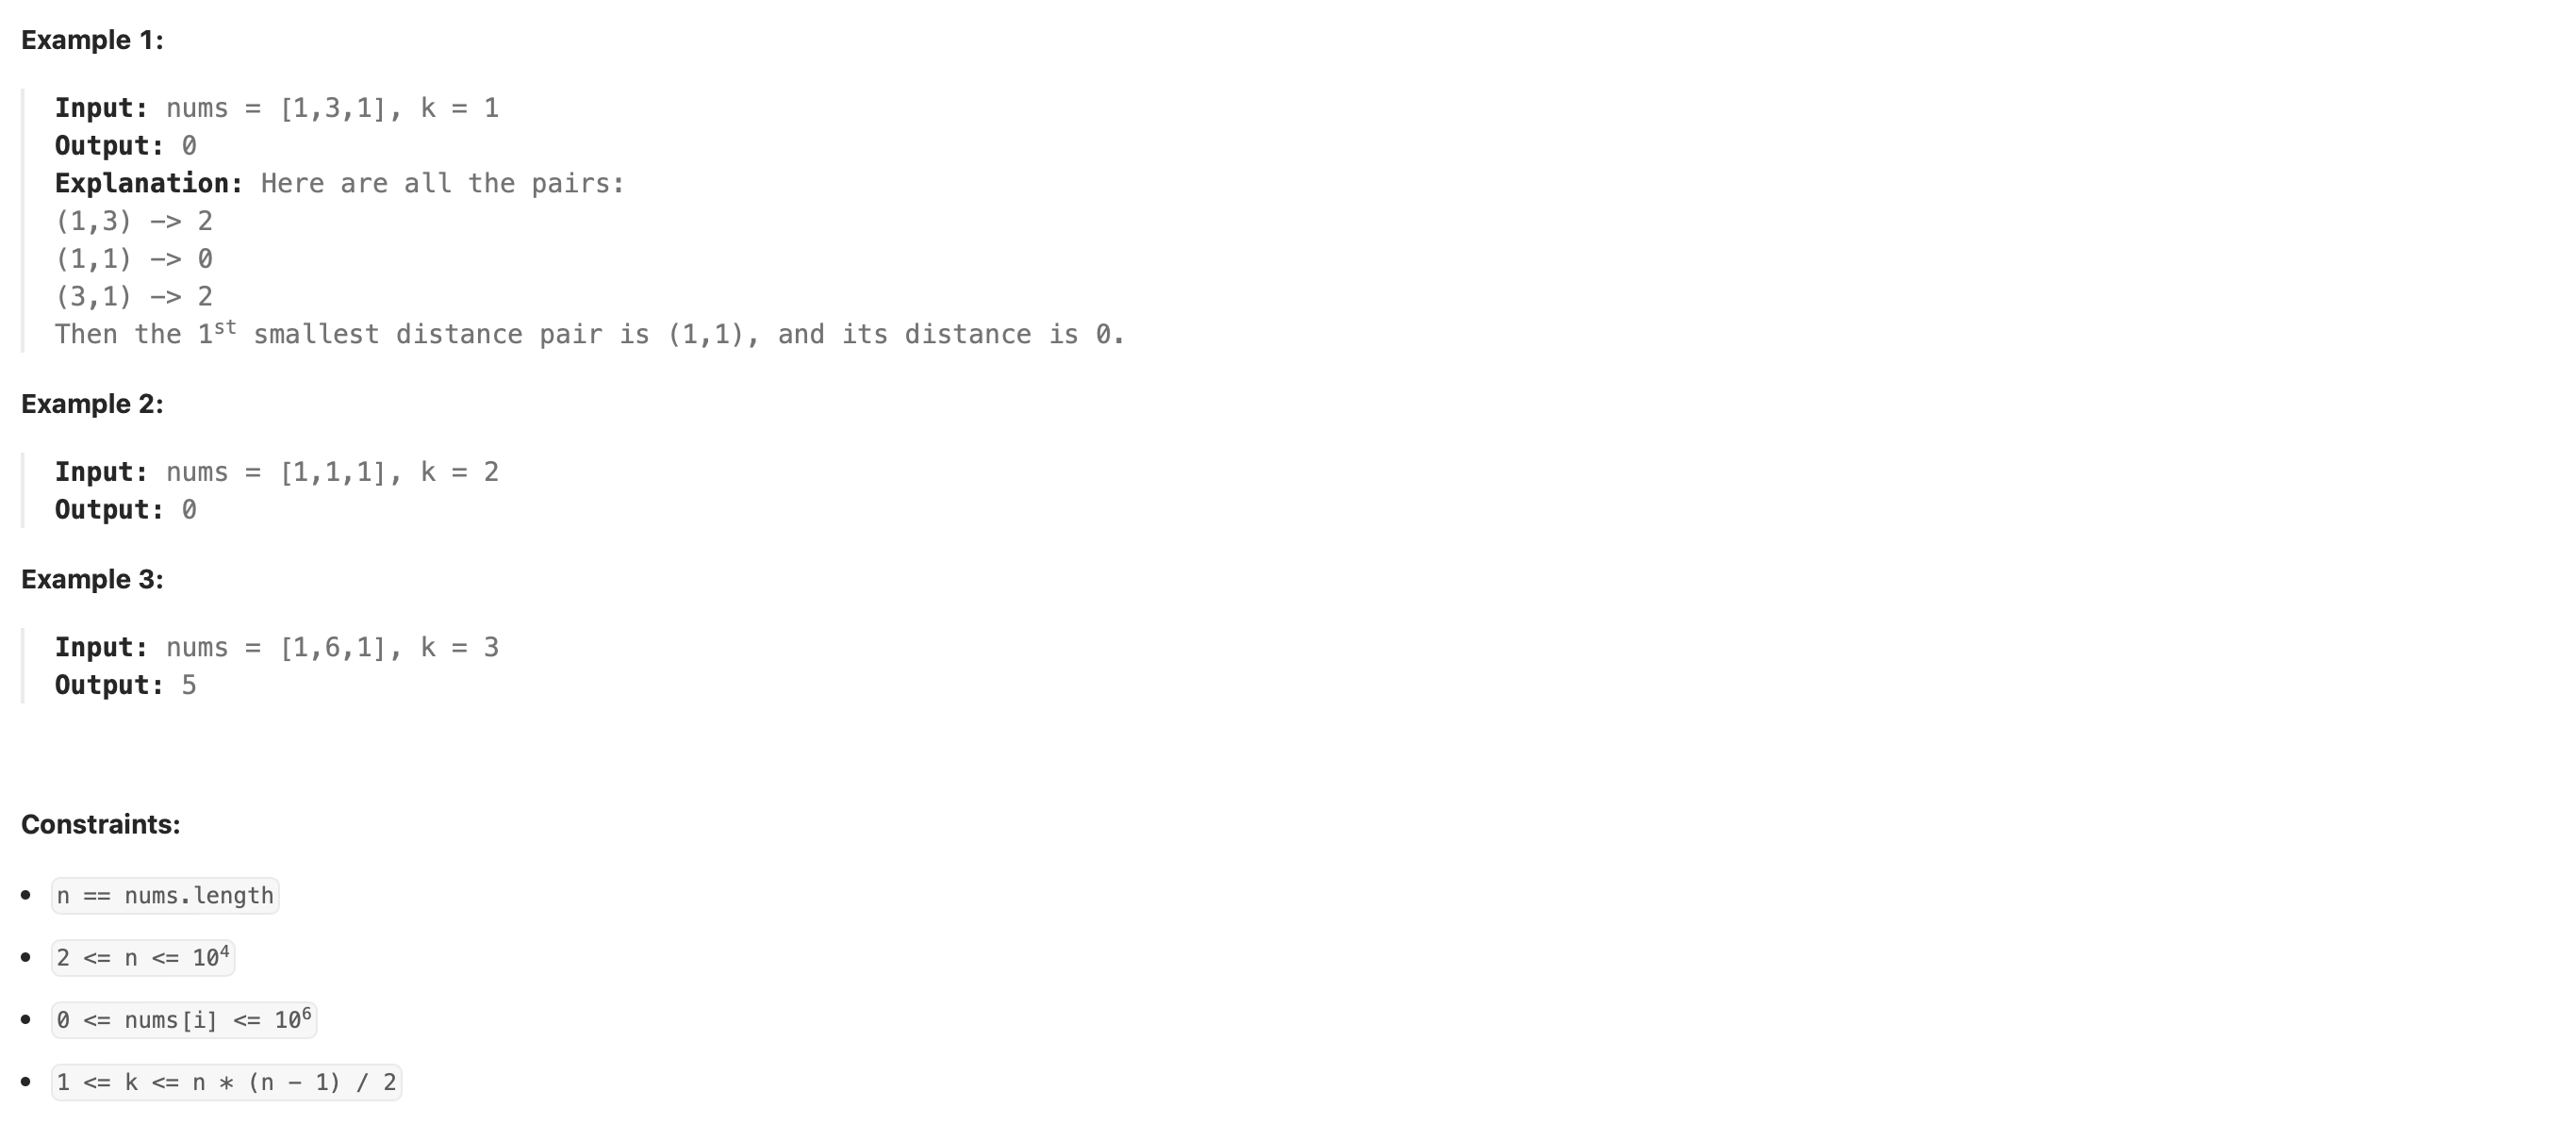

## Approach Overview:

Define the range of values the distance between pairs can take. Using binary binary search we pick a distance within the defined range (the middle distance value) and **count how many pairs have distances less than or equal to it**. We continuously do this until we pick / find the distance with a count of pair distance that is exactly `k` (i.e until we find the `k-th` smallest pair distance).


## Detailed Explanation:

Define the range of values the distance between integer pairs can take.

**Lower bound (smallest possible distance) = 0**

**Upper bound (largest possible distance) = max(nums) - min(nums) = maximum integer in `nums` - minimum integer in `nums`**

We sort `nums` to make it easier to iterate through and count pair distances, otherwise it's going to be impossible to go through `nums` and process integer pairs an efficient manner. 

We pick a `distance` within the range and then check if the number of pairs with distances <= `distance` is more than or equal to `k`. 

- If it is, we narrrow search range to find a smaller pair distance (until we find the `k-th` smallest pair distance). 

- Else we narrow search range to a find a larger pair distance.

**Example dry run**:

`nums = [1, 3, 2, 5]` and `k = 4`

`nums_sort = [1, 2, 3, 5]`

### Counting if the number of pair distances <= `distance` is greater than or equal to `k`

**Search range:** `left = 0`, `right = 4`

`mid (distance) = 2` 


*After 1st pass:*

`current integer pair = (1, 2)`, `pair distance = 1` and `pair distance <= mid`, so `count = 1` (`pairs = (1,2)`)

*After 2nd pass:*

`current integer pair = (1, 3)`, `pair distance = 2` and `pair distance <= mid`, so `count = 1 + 2 = 3` (`pairs = (1,2), (1,3) & (2,3)`)

*After 3rd pass:*


`current integer pair = (1, 5)`, `pair distance = 4` and `pair distance > mid`, so `count = 1 + 2 = 3` (`pairs = (1,2), (1,3) & (2,3)`)

`pair distance > mid` so we increment `left` until `pair distance <= mid`.

:

`current integer pair = (2, 5)`, `pair distance = 3` and `pair distance > mid`, so `count = 1 + 2 = 3` (`pairs = (1,2), (1,3) & (2,3)`)

`current integer pair = (3, 5)`, `pair distance = 2` and `pair distance <= mid`, so `count = 1 + 2 + 1 = 4` (`pairs = (1,2), (1,3) , (2,3) & (3,5)`)

:

:

`count = k = 4` **(so the 4th smallest pair distance is indeed 2)**

## Key Challenges:

- Figuring out that I had to sort `nums` to facilitate the counting of pair distances in an efficient order. I was breaking my brain trying to figure how count all the pair distances in an efficient manner.


## Solution:

In [ ]:
class Solution:
    def isDistanceValid(self, arr, distance, k):
        # initialize left pointer 
        l = 0
        # initialize variable to store count of all pairs with distances  <= `distance`  
        count = 0

        # loop through every integer in `arr` starting from the second element
        for r in range(1, len(arr)):

            # calculate the distance between the current pair of integers 
            currentDistancePair = arr[r] - arr[l]

            # check if the distance betwen the current integer pair > `distance`
            while currentDistancePair > distance:
                # increment left pointer (until the distance between current pair <= `distance`)
                l += 1

                # calculate the distance between the current pair of integers
                currentDistancePair = arr[r] - arr[l]

            # count all the integer pairs with distances <= `distance` (encountered so far) 
            count += r - l

        # return True if count >= k, otherwise False
        return count >= k   

    def smallestDistancePair(self, nums: List[int], k: int) -> int:
        # sort `nums` in ascending order
        nums = sorted(nums)      

        # initialize lower bound of search space (smallest possible distance)
        left = 0

        # initialize upper bound of search space (largest possible distance)
        right = nums[-1] - nums[0]

        # continue until the two pointers meet
        while left < right:

            # calculate the middle value of current range
            mid = left + (right - left) // 2

            # check if number of pairs with distances <= mid is more than or equal to k
            if self.isDistanceValid(nums, mid, k) == True :

            # narrow search range to find a smaller distance (until we find the smallest one possible)
                right = mid
            else:
                # narrow search range to find a larger distance
                left = mid + 1

        # return the k-th smallest possible distance amongst all integer pairs in `nums`
        return left